# An Integrated Simulation Assessment of London Underground Network Resilience and Passenger Movement

## Part I: London’s underground resilience
### Data Loading

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans" 

In [2]:
# Load GraphML file
G = nx.read_graphml('london.graph.xml')

# Since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

pos = nx.get_node_attributes(G, 'coords')

### I. Topological network
#### I.1. Central Measures:
1. **Degree Centrality**: Simply calculates the number of edges a node is connected to. In transportation networks, highly central nodes indicate connections to multiple lines or stations, serving as transportation hubs.
   $$C_D(v)=\frac{deg(v)}{n-1}$$
   where $deg(v)$ is the degree of node $v$, and $n$ is the total number of nodes in the network.

2. **Closeness Centrality**: Measures the reciprocal of the average distance from a node to all other nodes in the network. Nodes with high closeness centrality are more central in a subway network, allowing quick access to any other node.
   $$C_C(v)=\frac{n-1}{\sum_{u\neq v}d(v,u)}$$
   where $d(v,u)$ is the shortest path length between nodes $v$ and $u$.

3. **Betweenness Centrality**: The number of times a node lies on the shortest path between all pairs of nodes, reflecting the node's control in the network flow.
   $$C_B(v)=\sum_{s\neq v\neq t\in V}\frac{\sigma_{st}(v)}{\sigma_{st}}$$
   where $\sigma_{st}$ is the number of shortest paths between nodes $s$ and $t$, and $\sigma_{st}(v)$ is the number of these paths passing through $v$.

In [3]:
# Compute various centrality measures
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

nx.set_node_attributes(G,degree_centrality,'Degree Centrality')
df = pd.DataFrame(index=G.nodes())
df['Degree Centrality'] = pd.Series(nx.get_node_attributes(G, 'Degree Centrality'))

df_sorted_degree_centrality = df.sort_values(["Degree Centrality"], ascending=False)
df_sorted_degree_centrality[0:10]

,Degree Centrality
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [4]:
degree_centrality_sort = sorted(degree_centrality.items(), key=lambda x:-x[-1])
degree_centrality_sort[:10]

[('Stratford', 0.0225),
 ('Bank and Monument', 0.02),
 ('Baker Street', 0.0175),
 ("King's Cross St. Pancras", 0.0175),
 ('West Ham', 0.015),
 ('Canning Town', 0.015),
 ('Waterloo', 0.015),
 ('Green Park', 0.015),
 ('Oxford Circus', 0.015),
 ('Liverpool Street', 0.015)]

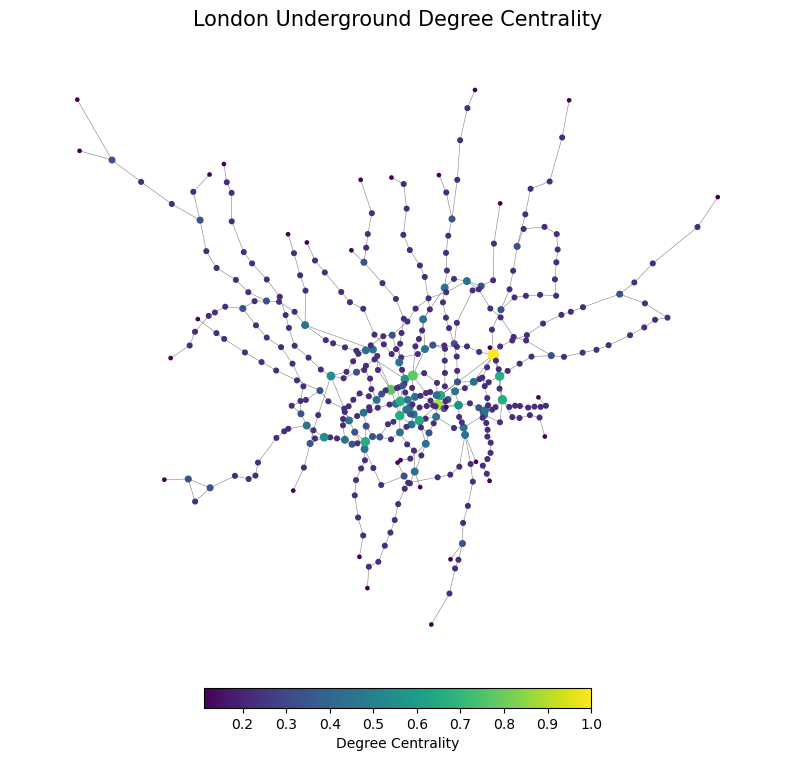

In [5]:
# Draw a subway line map based on degree centrality. The brighter the node color, the more important the node is.
degree_values=[(i[1]['Degree Centrality']) for i in G.nodes(data=True)]
deg_color=[(i[1]['Degree Centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['Degree Centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,10))

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5, pad=0.01)
plt.axis("off")
plt.title("London Underground Degree Centrality",fontsize=15)
plt.show()

In [6]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

nx.set_node_attributes(G,closeness_centrality,'Closeness Centrality')
df = pd.DataFrame(index=G.nodes())
df['Closeness Centrality'] = pd.Series(nx.get_node_attributes(G, 'Closeness Centrality'))

df_sorted_closeness_centrality = df.sort_values(["Closeness Centrality"], ascending=False)
df_sorted_closeness_centrality[0:10]

,Closeness Centrality
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


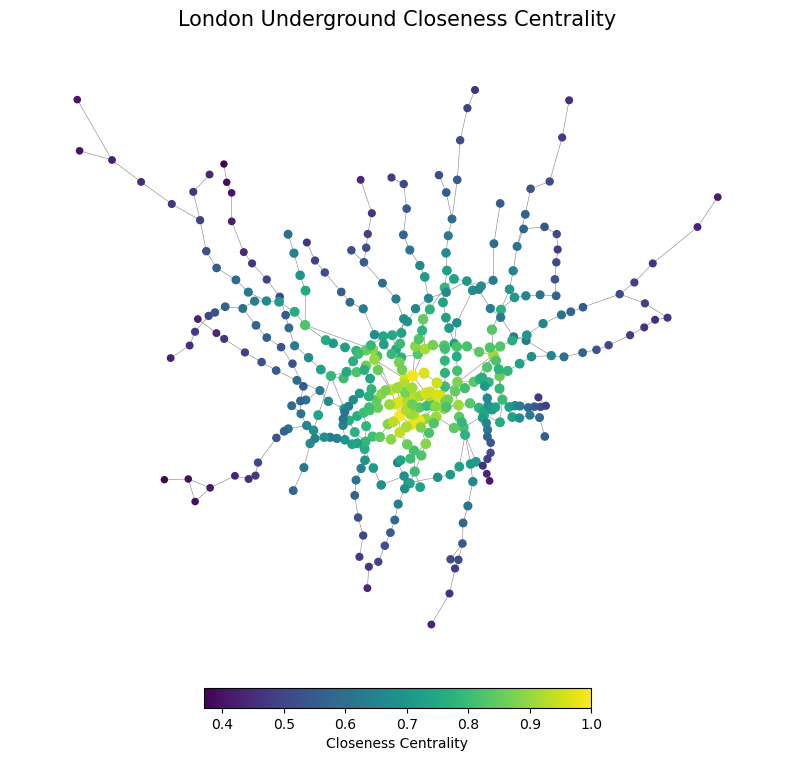

In [7]:
# Draw a subway line map based on centrality. 
degree_values=[(i[1]['Closeness Centrality']) for i in G.nodes(data=True)]

deg_color=[(i[1]['Closeness Centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['Closeness Centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5, pad=0.01)
plt.axis("off")
plt.title("London Underground Closeness Centrality",fontsize=15)
plt.show()

In [8]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

nx.set_node_attributes(G,betweenness_centrality,'Betweenness Centrality')
df = pd.DataFrame(index=G.nodes())
df['Betweenness Centrality'] = pd.Series(nx.get_node_attributes(G, 'Betweenness Centrality'))

df_sorted_betweenness_centrality = df.sort_values(["Betweenness Centrality"], ascending=False)
df_sorted_betweenness_centrality[0:10]

,Betweenness Centrality
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


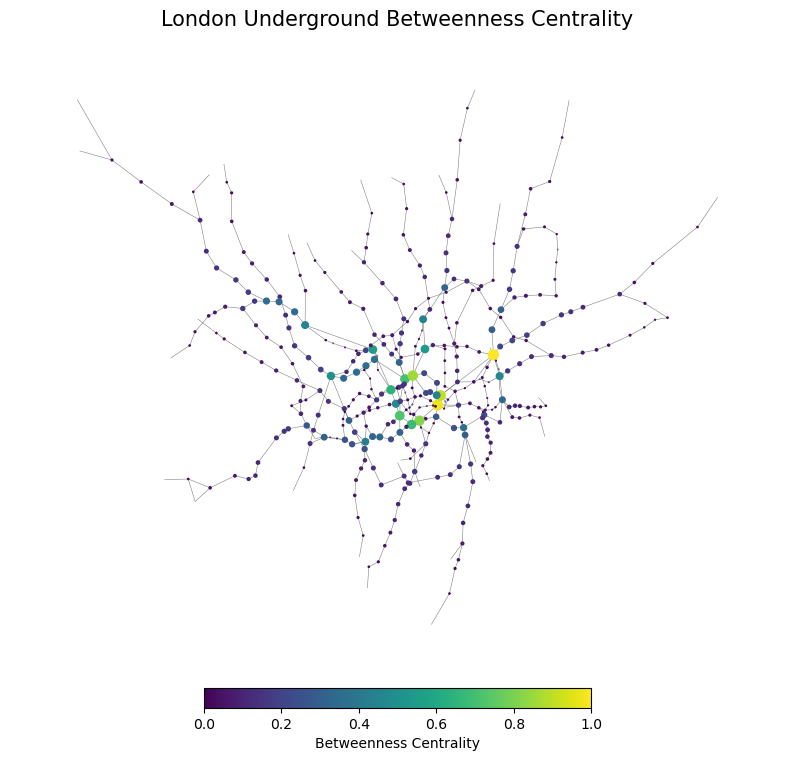

In [9]:
# Draw a subway line map based on centrality.
degree_values=[(i[1]['Betweenness Centrality']) for i in G.nodes(data=True)]
deg_color=[(i[1]['Betweenness Centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['Betweenness Centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5, pad=0.01)
plt.axis("off")
plt.title("London Underground Betweenness Centrality",fontsize=15)
plt.show()

#### I.2. Impact Measures:
1. **Global Efficiency**: Calculates the average of the inverse of the shortest path lengths between all pairs of nodes across the network.
   $$E_{\text{global}}(G) = \frac{1}{N(N-1)} \sum_{i \neq j \in V} \frac{1}{d(i,j)}$$
   where $V$ is  the set of nodes, $N$ is the total number of nodes in the network, and $d(i,j)$ is the shortest path length between nodes $i$ and $j$.


2. **Largest Connected Component**: The connected subgraph containing the most nodes in the network.
   $$ LCC = \frac{N'}{N} $$
   where $N'$ is the maximum number of nodes in a connected subgraph.


In [10]:
# Define two impact measures
def global_efficiency(graph):
    return nx.global_efficiency(graph)

def largest_connected_component_size(graph):
    if nx.is_connected(graph):
        return len(graph.nodes())
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc)

#### I.3. Node Removal:

In [11]:
# Two removal strategies
def attack_node(graph, dicts, K):
    '''
    node removal non-sequential
    dicts: Centrality algorithm results
    K: Remove node count
    '''
    G = graph.copy()
    N = len(G.nodes())
    res_con, res_eff = [],[]
    ge0 = global_efficiency(G)
    res_eff.append(ge0)
    lcc = largest_connected_component_size(G)
    res_con.append(lcc/N)

    dicts_sort = sorted(dicts.items(), key=lambda x:-x[-1])
    dicts_sort_nodes = [k for k,v in dicts_sort]

    for i in range(K):
        
        G.remove_node(dicts_sort_nodes[i])
        ge = global_efficiency(G)
        lcc = largest_connected_component_size(G)
        res_eff.append(ge)
        res_con.append(lcc/N)
    
    return res_con, res_eff

def attack_node_sequential(graph, method, K):
    '''
    node removal sequential
    method: Centrality algorithm results
    K: Remove node count
    '''

    G = graph.copy()
    res_con, res_eff = [],[]
    N = len(G.nodes())
    ge0 = global_efficiency(G)
    res_eff.append(ge0)
    lcc = largest_connected_component_size(G)
    res_con.append(lcc/N)
    record_nodes = []

    for _ in range(K):

        if method == 'DC':
            dicts = dict(nx.degree(G))
        elif method == 'CC':
            dicts = dict(nx.closeness_centrality(G))
        elif method == 'BC':
            dicts = dict(nx.betweenness_centrality(G))
        else:
            raise NameError('input error')

        nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        node = nodes_sort[0]
        G.remove_node(node)

        ge = global_efficiency(G)
        lcc = largest_connected_component_size(G)
        res_eff.append(ge)
        res_con.append(lcc/N)
        record_nodes.append(node)

    return res_con, res_eff, record_nodes

def show_node_attack(DC, BC, CC, ylabel):
    '''
    Attack visualization display
    '''
    x1 = [i for i in range(len(DC))]
    x2 = [i for i in range(len(BC))]
    x3 = [i for i in range(len(CC))]

    plt.figure(figsize=(10,7))

    plt.plot(x1,DC,'r', label='Degree Centrality', marker='.')
    plt.plot(x2,BC,'royalblue', label='Betweenness Centrality', marker='^')
    plt.plot(x3,CC,'coral', label='Closeness Centrality', marker='*')

    plt.tick_params(labelsize=13)
    plt.legend(fontsize=13)
    plt.xlabel('Remove Node Number',fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.show()


def compare_att(data1, data2, label, ylabel):
    '''
    Comparison between sequential and non-sequential
    '''

    x1 = [i for i in range(len(data1))]
    x2 = [i for i in range(len(data2))]

    plt.figure(figsize=(10,7))

    plt.plot(x1,data1,'r', label=label+ ' (non-sequential)', marker='.')
    plt.plot(x2,data2,'royalblue', label=label+ ' (sequential)', marker='^')

    plt.tick_params(labelsize=13)
    plt.legend(fontsize=13)
    plt.xlabel('Remove Node Number',fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.show()

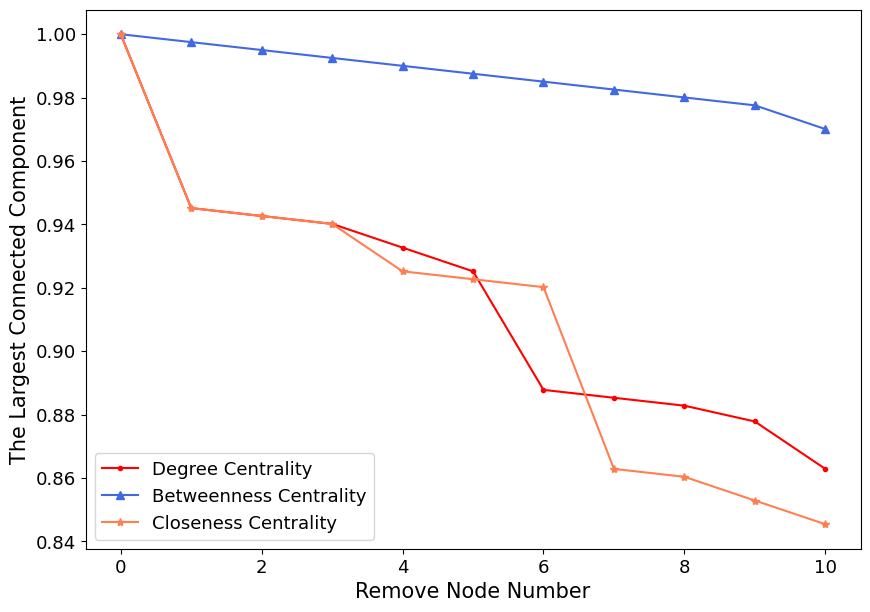

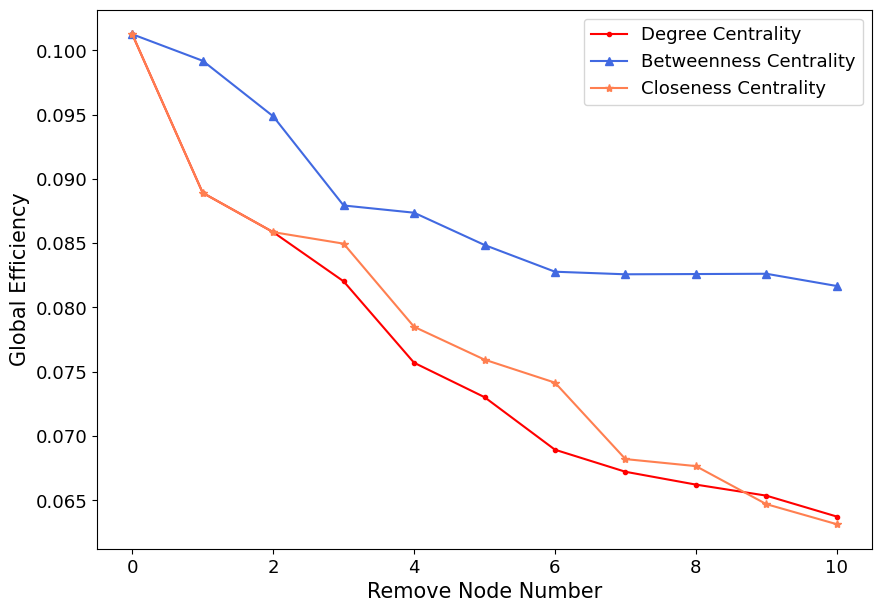

In [12]:
# node removal non-sequential
K = 10 # Remove node count

dc = dict(nx.degree(G))
bc = dict(nx.betweenness_centrality(G))
cc = dict(nx.closeness_centrality(G))

dc_con, dc_eff = attack_node(G, dc, K)
cc_con, cc_eff = attack_node(G, bc, K)
bc_con, bc_eff = attack_node(G, cc, K)

show_node_attack(dc_con, bc_con, cc_con, 'The Largest Connected Component')
show_node_attack(dc_eff, bc_eff, cc_eff, 'Global Efficiency')

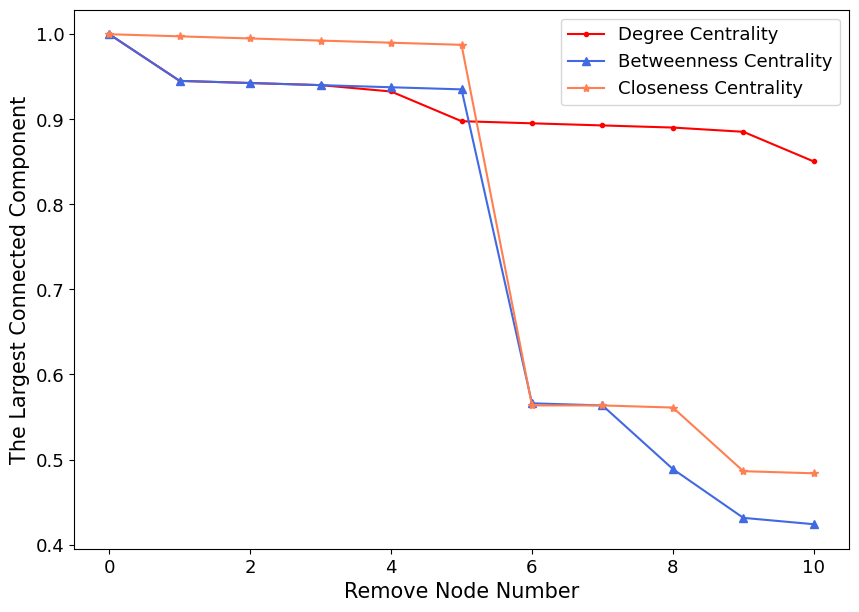

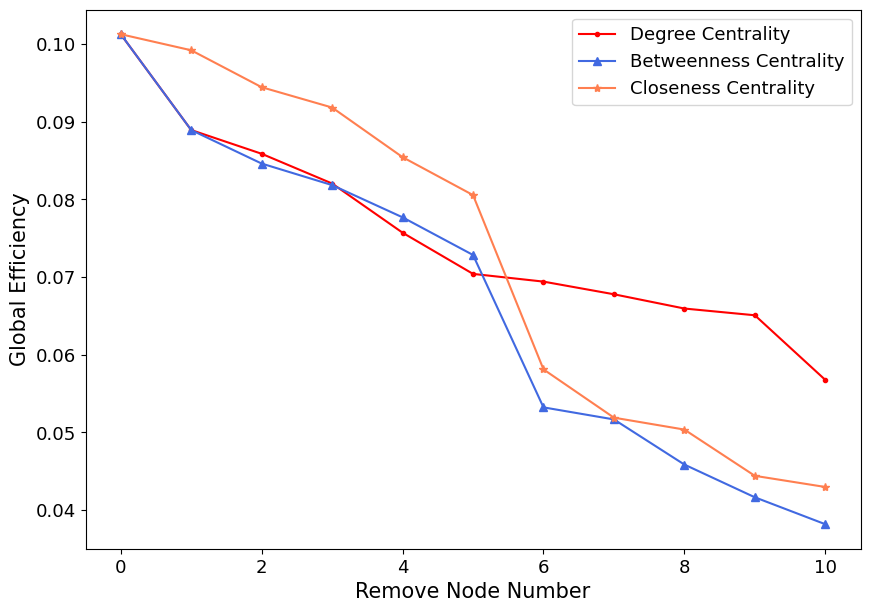

 1 times removal: DC: Stratford                     , CC: Green Park                    , BC: Stratford                     
 2 times removal: DC: Bank and Monument             , CC: King's Cross St. Pancras      , BC: King's Cross St. Pancras      
 3 times removal: DC: Baker Street                  , CC: Waterloo                      , BC: Waterloo                      
 4 times removal: DC: King's Cross St. Pancras      , CC: Bank and Monument             , BC: Bank and Monument             
 5 times removal: DC: Canning Town                  , CC: West Hampstead                , BC: Canada Water                  
 6 times removal: DC: Green Park                    , CC: Canada Water                  , BC: West Hampstead                
 7 times removal: DC: Earl's Court                  , CC: Stratford                     , BC: Earl's Court                  
 8 times removal: DC: Waterloo                      , CC: Earl's Court                  , BC: Shepherd's Bush               


In [13]:
# node removal sequential

se_dc_con, se_dc_eff, se_dc_nodes = attack_node_sequential(G, 'DC', K)
se_cc_con, se_cc_eff, se_cc_nodes = attack_node_sequential(G, 'CC', K)
se_bc_con, se_bc_eff, se_bc_nodes = attack_node_sequential(G, 'BC', K)

show_node_attack(se_dc_con, se_bc_con, se_cc_con, 'The Largest Connected Component')
show_node_attack(se_dc_eff, se_bc_eff, se_cc_eff, 'Global Efficiency')

for i in range(K):
    print('{:2} times removal: DC: {:30}, CC: {:30}, BC: {:30}'.format(i+1, se_dc_nodes[i], se_cc_nodes[i], se_bc_nodes[i]))

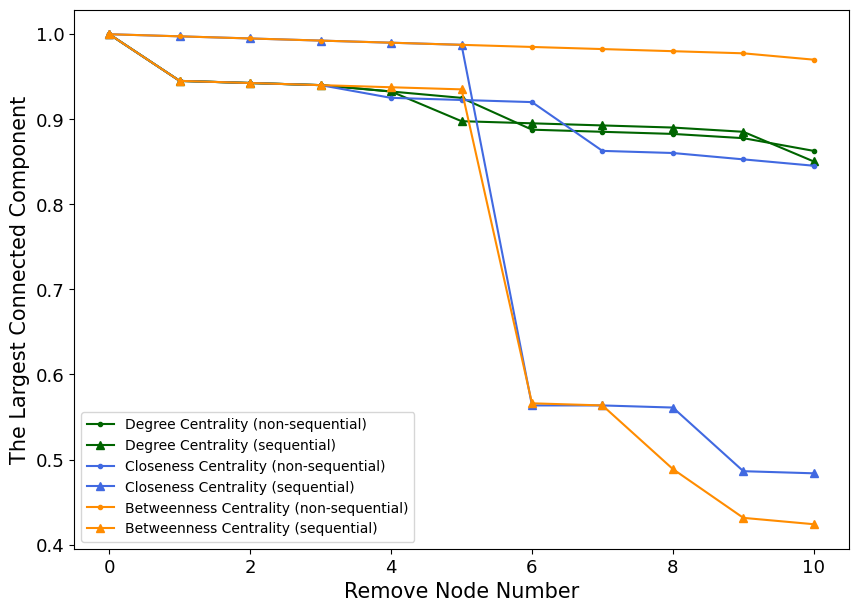

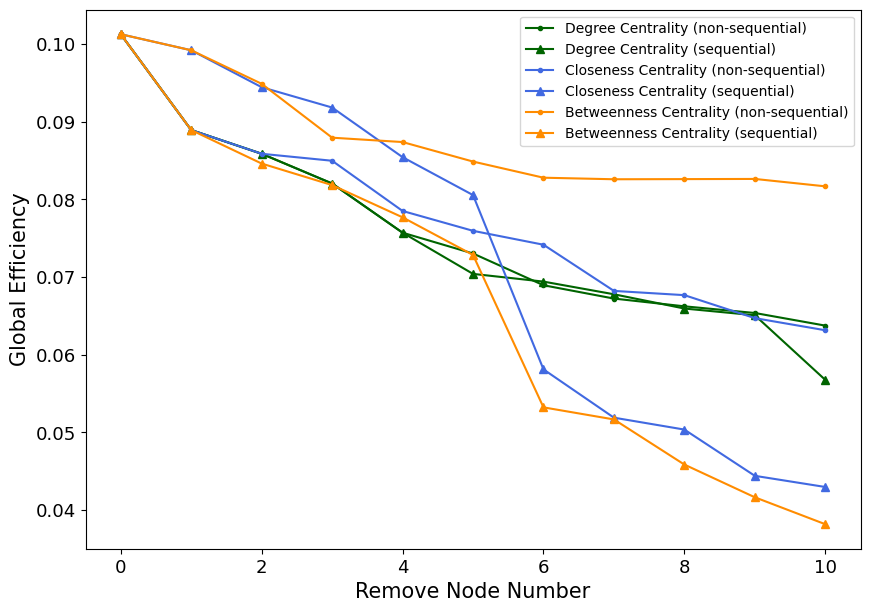

In [14]:
# Two strategies of three centralities put together
def compare_att_2(data1, data2, data3, data4, data5, data6, ylabel):
    '''
    Comprehensive comparison
    '''

    x1 = [i for i in range(len(data1))]
    x2 = [i for i in range(len(data2))]
    x3 = [i for i in range(len(data3))]
    x4 = [i for i in range(len(data4))]
    x5 = [i for i in range(len(data5))]
    x6 = [i for i in range(len(data6))]

    plt.figure(figsize=(10,7))

    plt.plot(x1,data1,'darkgreen', label='Degree Centrality (non-sequential)', marker='.')
    plt.plot(x2,data2,'darkgreen', label='Degree Centrality (sequential)', marker='^')

    plt.plot(x3,data3,'royalblue', label='Closeness Centrality (non-sequential)', marker='.')
    plt.plot(x4,data4,'royalblue', label='Closeness Centrality (sequential)', marker='^')

    plt.plot(x5,data5,'darkorange', label='Betweenness Centrality (non-sequential)', marker='.')
    plt.plot(x6,data6,'darkorange', label='Betweenness Centrality (sequential)', marker='^')

    plt.tick_params(labelsize=13)
    plt.legend(fontsize=10)
    plt.xlabel('Remove Node Number',fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.show()

compare_att_2(dc_con, se_dc_con, cc_con, se_cc_con, bc_con, se_bc_con, 'The Largest Connected Component')
compare_att_2(dc_eff, se_dc_eff, cc_eff, se_cc_eff, bc_eff, se_bc_eff, 'Global Efficiency')

### II. Flows: Weighted network
#### II.1. Adjustment of Centrality Measures Considering Passenger Flow
1. **Weighted Degree Centrality**: 
   $$C^W_D(v) = \sum_{u \in N(v)} w(v, u)$$
   where $w(v,u)$ is the weight of the edge between nodes $v$ and $u$.

2. **Weighted Closeness Centrality**:
   $$C^W_C(v) = \frac{n - 1}{\sum_{u \neq v} w(u, v)}$$
   where $w(v,u)$ is the weight of the edge between nodes $v$ and $u$.

3. **Weighted Betweenness Centrality**: 
   $$C^W_B(v) = \sum_{s \neq v \neq t \in V} \frac{\rho^W_{st}(v)}{\rho^W_{st}}$$
   where $ρ_{st}^w$ , $β_{st}^w (v)$ is the number of shortest weighted paths between nodes $s$ and $t$ and the number of these paths passing througth.

In [15]:
# Use flows as edge weight
for u, v, d in G.edges(data=True):
    G[u][v]['weight'] = float(d['flows'])

# Invert the weights
for u, v, d in G.edges(data=True):
    try:
        G[u][v]['flows_1'] = 1/float(d['flows'])
    except:
        G[u][v]['flows_1'] = 0 

In [16]:
# Compute various centrality measures
## Weighted Degree Centrality 
degree_centrality_weighted = {
    node: sum(data['weight'] for neighbor, data in G[node].items())
    for node in G.nodes()
}

nx.set_node_attributes(G,degree_centrality_weighted,'Weighted Degree Centrality')
df = pd.DataFrame(index=G.nodes())
df['Weighted Degree Centrality'] = pd.Series(nx.get_node_attributes(G, 'Weighted Degree Centrality'))

df_sorted_degree_centrality_weighted = df.sort_values(["Weighted Degree Centrality"], ascending=False)
df_sorted_degree_centrality_weighted[0:10]

,Weighted Degree Centrality
Green Park,628642.0
Bank and Monument,618193.0
Waterloo,588394.0
Westminster,475909.0
King's Cross St. Pancras,450009.0
Liverpool Street,400895.0
Stratford,364561.0
Euston,354400.0
Bond Street,321855.0
Baker Street,316683.0


In [17]:
flow_color=[(i[2]['flows']/200000) for i in G.edges(data=True)]
flow_width=[(i[2]['flows']/200000 * 10) for i in G.edges(data=True)]

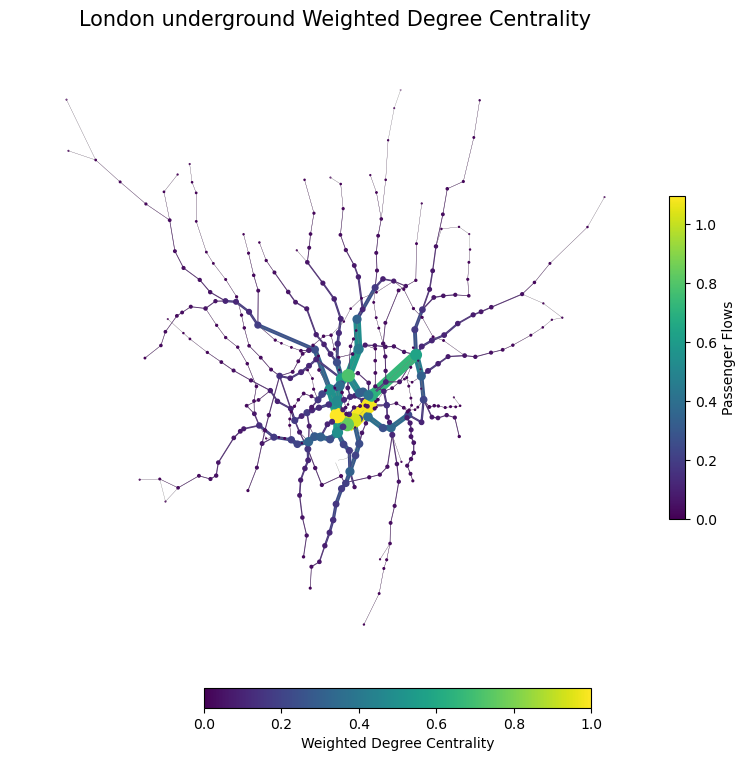

In [18]:
# Weighted Degree Centrality
nodes = list(G.nodes())
degree_values=[degree_centrality_weighted[node] for node in nodes]

deg_color=[(degree_centrality_weighted[node]/(max(degree_values))) for node in nodes]
deg_size=[(degree_centrality_weighted[node]/(max(degree_values)))*100 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(10,10))

edg=nx.draw_networkx_edges(G, pos, edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Weighted Degree Centrality",orientation="horizontal", shrink=0.5, pad=0.01)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5, pad=0.01)
plt.axis("off")
plt.title("London underground Weighted Degree Centrality",fontsize=15)
plt.show()

In [19]:
## Closeness Centrality

closeness_centrality_weighted = nx.closeness_centrality(G, distance='flows_1')

nx.set_node_attributes(G, closeness_centrality_weighted, 'Weighted Closeness Centrality')
df = pd.DataFrame(index=G.nodes())
df['Weighted Closeness Centrality'] = pd.Series(nx.get_node_attributes(G, 'Weighted Closeness Centrality'))

df_sorted_closeness_centrality_weighted = df.sort_values(["Weighted Closeness Centrality"], ascending=False)
df_sorted_closeness_centrality_weighted[0:10].style.format({'Weighted Closeness Centrality': '{:.20f}'})

,Weighted Closeness Centrality
Green Park,2377.56951852178690387518
Westminster,2372.54201612265887888498
Waterloo,2367.99882292124129889999
Bank and Monument,2364.57706570031768933404
Oxford Circus,2355.79624189779542575707
Bond Street,2352.78078890630831665476
Victoria,2345.84267904848229591153
Liverpool Street,2345.15562584945610069553
Warren Street,2329.98952287722340770415
Moorgate,2325.09514603711795643903


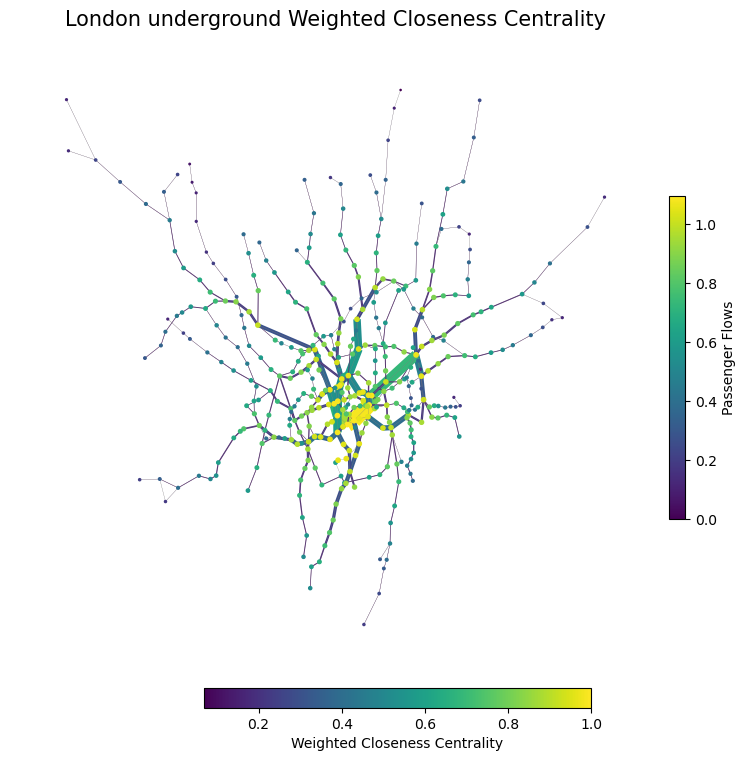

In [20]:
# Weighted Closeness Centrality
nodes = list(G.nodes())
closeness_values = [closeness_centrality_weighted[node] for node in nodes]

closeness_color = [(closeness_centrality_weighted[node]/(max(closeness_values))) for node in nodes]
closeness_size = [(closeness_centrality_weighted[node]/(max(closeness_values)))*10 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(10,10))

edg=nx.draw_networkx_edges(G, pos, edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closeness_color,
        node_size= closeness_size)

plt.colorbar(nod,label="Weighted Closeness Centrality",orientation="horizontal", shrink=0.5, pad=0.01)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5, pad=0.01)
plt.axis("off")
plt.title("London underground Weighted Closeness Centrality",fontsize=15)
plt.show()

In [21]:
## Weighted Betweenness Centrality
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='flows_1')

nx.set_node_attributes(G, betweenness_centrality_weighted, 'Weighted Betweenness Centrality')
df = pd.DataFrame(index=G.nodes())
df['Weighted Betweenness Centrality'] = pd.Series(nx.get_node_attributes(G, 'Weighted Betweenness Centrality'))

df_sorted_betweenness_centrality_weighted = df.sort_values(["Weighted Betweenness Centrality"], ascending=False)
df_sorted_betweenness_centrality_weighted[0:10]

,Weighted Betweenness Centrality
Green Park,0.562563
Bank and Monument,0.498227
Waterloo,0.399803
Westminster,0.371736
Liverpool Street,0.332456
Stratford,0.327381
Bond Street,0.288177
Euston,0.279624
Oxford Circus,0.265752
Warren Street,0.249574


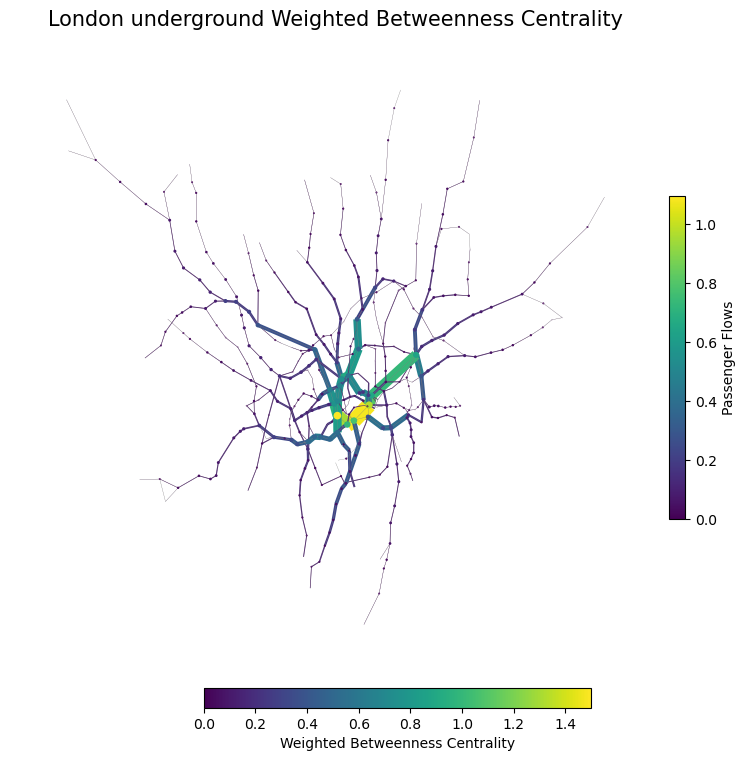

In [22]:
# Weighted Betweenness Centrality
nodes = list(G.nodes())
betweenness_values = [betweenness_centrality_weighted[node] for node in nodes]

betweenness_color = [(betweenness_centrality_weighted[node]/(max(betweenness_values))*1.5) for node in nodes]
betweenness_size = [(betweenness_centrality_weighted[node]/(max(betweenness_values)))*20 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(10,10))

edg=nx.draw_networkx_edges(G, pos, edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= betweenness_color,
        node_size= betweenness_size)

plt.colorbar(nod,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5, pad=0.01)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5, pad=0.01)
plt.axis("off")
plt.title("London underground Weighted Betweenness Centrality",fontsize=15)
plt.show()

#### II.2 & II.3 Adjustment of Impact Measures for Node Removal
1. **Global Efficiency (Adjusted)**
   
2. **Largest Connected Component (Adjusted)**
   
3. **Average Path Length**

In [23]:
# network efficiency
# average shorst path lenght
# LCC
def cal_global_efficiency_apl(G,N):

    apl = 0
    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0,0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    path = nx.shortest_path(G, nodes[i], nodes[j])
                    t = 0
                    t1 = 0
                    for k in range(len(path)-1):
                        weight = G.get_edge_data(path[k], path[k+1])['flows_1']
                        t += weight
                    e += 1/t
                    apl += t
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))
    APL = apl / (N*(N-1))

    return E, APL

def attack_node_new(G1, dicts, K):
    '''
    G1:Network Graph
    dicts: different centrality measures
    K:times of attacks
    '''

    G = G1.copy()

    res_eff = []
    res_con = []
    res_apl = []

    N = len(G.nodes())
    ge0, apl = cal_global_efficiency_apl(G,N)
    res_eff.append(ge0)
    res_apl.append(apl)
    # lcc0 = cal_weight_lcc(G)
    flows = [i[2]['flows'] for i in G.edges(data=True)]
    res_con.append(sum(flows))
    
    dicts_sort = sorted(dicts.items(), key=lambda x:-x[-1])
    dicts_sort_nodes = [k for k,v in dicts_sort]

    for i in range(K):
        
        G.remove_node(dicts_sort_nodes[i])
        if nx.is_connected(G): 
            flows = [i[2]['flows'] for i in G.edges(data=True)]
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            subgraph = G.subgraph(largest_cc)
            flows = [i[2]['flows'] for i in subgraph.edges(data=True)]
        ge, apl = cal_global_efficiency_apl(G,N)
        res_eff.append(ge)
        
        res_con.append(sum(flows))
        res_apl.append(apl)
    
    return res_con, res_eff, res_apl


def attack_node_sequential1(graph, method, K):
    '''
    node removal sequential
    graph: network graph
    method: centrality measures
    K: Remove node count
    '''

    G = graph.copy()
    res_con, res_eff = [],[]
    res_apl = []
    N = len(G.nodes())
    ge0, apl = cal_global_efficiency_apl(G,N)
    res_eff.append(ge0)
    res_apl.append(apl)
    # lcc0 = cal_weight_lcc(G)
    flows = [i[2]['flows'] for i in G.edges(data=True)]
    res_con.append(sum(flows))    
    record_nodes = []

    for _ in range(K):

        if method == 'BC':
            dicts = dict(nx.betweenness_centrality(G))
        elif method == 'WBC':
            dicts = dict(nx.betweenness_centrality(G,weight='flows_1'))
        else:
            raise NameError('input error')

        nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        node = nodes_sort[0]
        G.remove_node(node)

        if nx.is_connected(G): 
            flows = [i[2]['flows'] for i in G.edges(data=True)]
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            subgraph = G.subgraph(largest_cc)
            flows = [i[2]['flows'] for i in subgraph.edges(data=True)]
        ge, apl = cal_global_efficiency_apl(G,N)
        res_eff.append(ge)
        
        res_con.append(sum(flows))
        res_apl.append(apl)
    
        record_nodes.append(node)

    return res_con, res_eff, res_apl, record_nodes

In [24]:
K1 = 3
bc_con_g1, bc_eff_g1, bc_apl_g1 = attack_node_new(G, betweenness_centrality_weighted, K1)
bc_con_g2, bc_eff_g2, bc_apl_g2, record_nodes = attack_node_sequential1(G, 'WBC', K1)

In [25]:

dicts_sort = sorted(betweenness_centrality_weighted.items(), key=lambda x:-x[-1])
dicts_sort_nodes = [k for k,v in dicts_sort][:K1]
dicts_sort_nodes

['Green Park', 'Bank and Monument', 'Waterloo']

In [26]:
record_nodes

['Green Park', 'Bank and Monument', "King's Cross St. Pancras"]

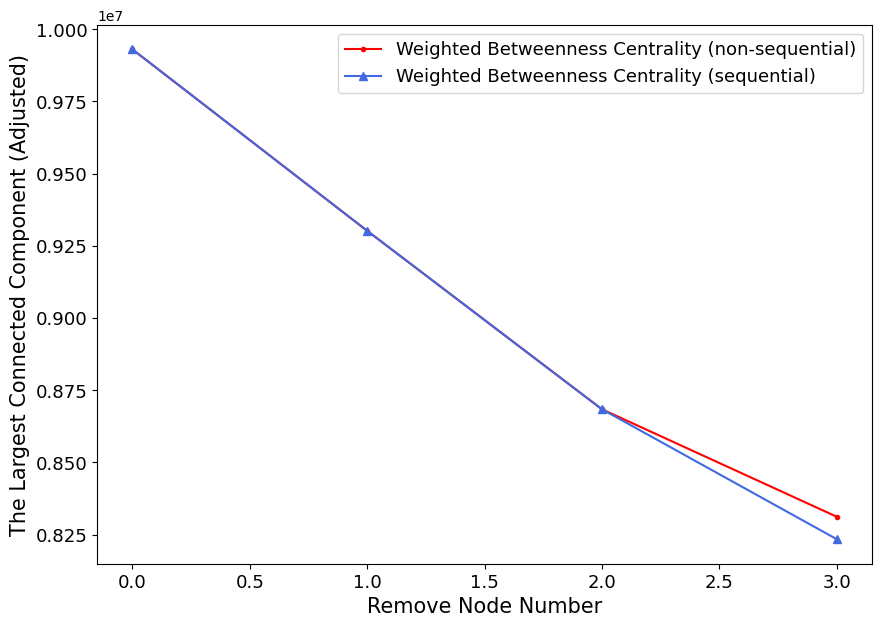

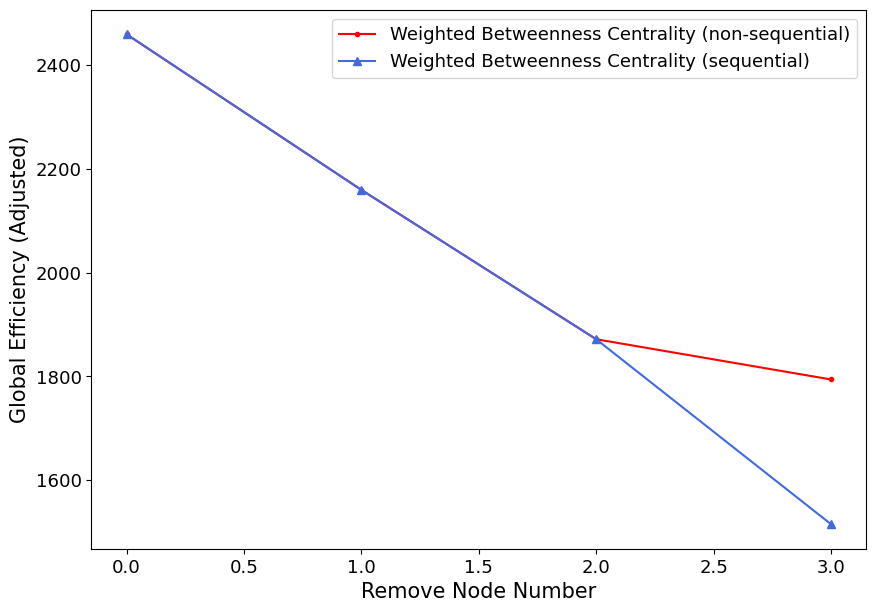

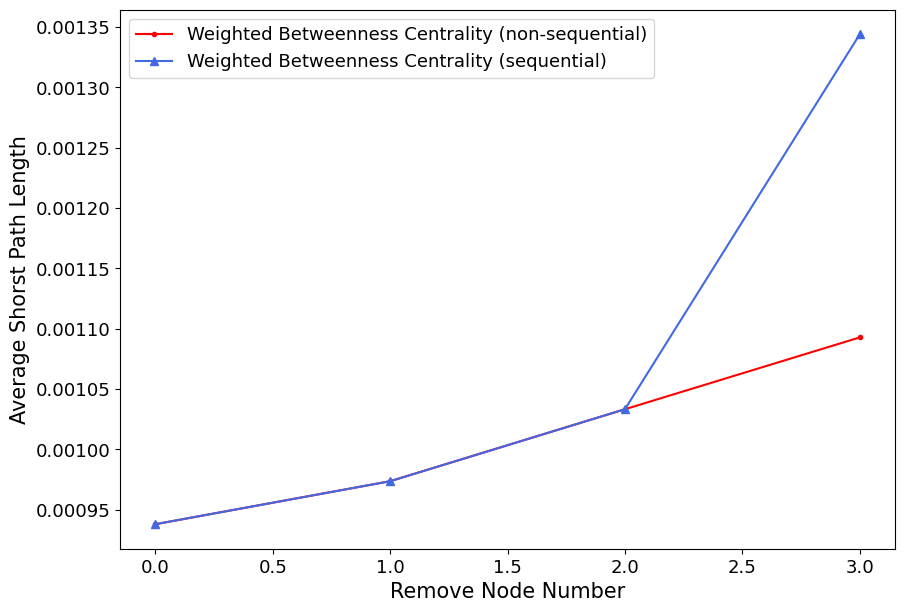

In [27]:
compare_att(bc_con_g1, bc_con_g2, 'Weighted Betweenness Centrality', 'The Largest Connected Component (Adjusted)')
compare_att(bc_eff_g1, bc_eff_g2, 'Weighted Betweenness Centrality', 'Global Efficiency (Adjusted)')
compare_att(bc_apl_g1, bc_apl_g2, 'Weighted Betweenness Centrality', 'Average Shorst Path Length')

## Part 2: Spatial Interaction models
### Data Loading

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
from math import sqrt

london_flows = pd.read_csv('london_flows.csv')
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [29]:
london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [30]:
# Delete Battersea Park data
data = london_flows[
    (london_flows.station_origin != "Battersea Park")
    & (london_flows.station_destination != "Battersea Park")
]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61431 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61431 non-null  object 
 1   station_destination  61431 non-null  object 
 2   flows                61431 non-null  int64  
 3   population           61431 non-null  int64  
 4   jobs                 61431 non-null  int64  
 5   distance             61431 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


### III. Models and calibration
#### III.1. Spatial Interaction Models Introduction

#### III.2. Model Selection and Cost Parameter Calibration
##### Production-constrained model：

\begin{equation}  \tag{1}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation}  \tag{2}
O_i = \sum_j T_{ij}
\end{equation}

and

\begin{equation}  \tag{3}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}

$O_i$ is a known constraint. $A_i$ is known as a balancing factor and is a vector of values which relate to each origin, $i$, which do the equivalent job to $k$ in the unconstrained/total constrained model but ensure that flow estimates from each origin sum to the known totals. γ: parameter for the destination. β: distance/cost decay parameter.

\begin{equation} \tag{4}
\lambda_{ij} = \exp (\alpha_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

\begin{equation} \tag{5}
\lambda_{ij} = \exp (\alpha_i + \gamma \ln D_j - \beta d_{ij})
\end{equation}

In [31]:
# flow matrix of observed data
datamat = pd.pivot_table(
    data,
    values="flows",
    index=["station_origin"],
    columns=["station_destination"],
    aggfunc='sum',
    margins=True,
)
datamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [32]:
# remove intraflows
data = data[data["station_origin"] != data["station_destination"]]

In [33]:
# Logarithmic transformation of variables
x_variables = ["jobs", "distance"]
log_x_variables = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_variables.append(f"log_{x}")

In [34]:
# Poisson regression model (4)
# create the formula (the "-1" indicates no intercept in the regression model).
formula_log_log = 'flows ~ station_origin + log_jobs + log_distance -1'
# run a production constrained sim
prodSim_log_log = smf.glm(formula = formula_log_log, data=data, family=sm.families.Poisson()).fit()

print(prodSim_log_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Mon, 29 Apr 2024   Deviance:                   1.8615e+06
Time:                        00:20:28   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [35]:
# Poisson regression model (5)
# create the formula (the "-1" indicates no intercept in the regression model).
formula_semi_log = 'flows ~ station_origin + log_jobs + distance -1'
# run a production constrained sim
prodSim_semi_log = smf.glm(formula = formula_semi_log, data=data, family=sm.families.Poisson()).fit()

print(prodSim_semi_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 29 Apr 2024   Deviance:                   1.6477e+06
Time:                        00:20:39   Pearson chi2:                 2.40e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

A comprehensive comparison of the GLM regression results of the two formulas shows that **the formula using the original distance (Formula 5)** has a better data fit: the Log-Likelihood is -9.0994e+05, which is higher than the logarithm of the distance (Formula 4). Deviance and Pearson chi2 are 1.6477e+06 and 2.4e+06 respectively, which are lower than the logarithm of distance (Formula 4), and the P value is close to 0, which means that the influence of the variables is statistically significant.

Therefore, Formula 5 is used for further analysis below.

In [36]:
# create some Oi and Dj columns in the dataframe and store row and column flowss in them:
# to create O_i, take datasub ...then... group by origin ...then... summarise by calculating the sum of flows
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg('sum'))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg('sum'))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

In [37]:
# get coefficients from prodSim glm object
coefs = pd.DataFrame(prodSim_semi_log.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "", regex=True)
# join back into the dataframe
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,-2.914322


In [38]:
alpha_i = prodSim_semi_log.params.iloc[:-2]
gamma = prodSim_semi_log.params.iloc[-2]
beta = -prodSim_semi_log.params.iloc[-1]
print(alpha_i)
print('Gamma:', gamma)
print('Beta:', beta)

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 398, dtype: float64
Gamma: 0.7552215895690787
Beta: 0.0001531661934633799


In [39]:
# generate estimates
data["prodsimest1"] = np.exp(data["alpha_i"] + gamma*data["log_jobs"] - data["distance"]*beta)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,-2.914322,77.685360
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,-2.914322,1.465951
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,-2.914322,4.121373
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,-2.914322,99.484532
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,-2.914322,56.125688
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096721,8.807842,599,1208,-2.914322,4.141812
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739337,8.249276,599,845,-2.914322,4.901455
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,9.048280,599,1748,-2.914322,4.144676
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745236,8.784484,599,850,-2.914322,3.252193
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415097,8.283576,599,611,-2.914322,3.759238


In summary, it can be seen that **γ is 0.7552215895690787**, which is related to the destination attractiveness (job), indicating that for every additional unit of job opportunities, the predicted traffic will increase by 0.7552215895690787 units; **β (distance decay coefficient) is 0.0001531661934633799**, indicating that for every increase in distance by 1 units, the flow will be reduced by 0.0001531661934633799.

##### Assessing model output
* Flow matrix 

In [40]:
# first round the estimates
data["prodsimest1"] = round(data["prodsimest1"],0)
# now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
datamat1 = data.pivot_table(values="prodsimest1", index="station_origin", columns="station_destination",
                            aggfunc='sum', margins=True)
datamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [41]:
# Compare with original observed data
datamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [42]:
# People flow data is rounded to match actual conditions
data["prodmodelest"] = np.round(prodSim_semi_log.mu)  
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,prodmodelest
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,-2.914322,78.0,78.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,-2.914322,1.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,-2.914322,4.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,-2.914322,99.0,99.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,-2.914322,56.0,56.0


In [43]:
# Predicted data of data matrix of model
datamat2 = pd.pivot_table(data, values='prodmodelest', index=['station_origin'], columns=['station_destination'],
                          aggfunc='sum', margins=True)
datamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [44]:
datamat1 = datamat2

The role of the origin constraint is reflected here: the sum of all destinations for each origin in the estimation matrix is almost the same as the sum of the observation matrix. But this is not the case when summing all origins for each destination.

In [45]:
# set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed - estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [46]:
CalcRSqaured(data["flows"], data["prodsimest1"])

0.4680648443542884

In [47]:
CalcRMSE(data["flows"], data["prodsimest1"])

96.263

### IV. Scenarios
#### IV.1. Scenario A
Assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated paramete β, compute the new flows for scenario A. Make sure the number of commuters is conserved, and explain how you ensured this.

In [48]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2 * row['jobs']
    else:
        val = row["jobs"]
    return val
        
data["jobs_ScenarioA"] = data.apply(new_job, axis =1)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,prodmodelest,jobs_ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,-2.914322,78.0,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,-2.914322,1.0,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,-2.914322,4.0,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,-2.914322,99.0,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,-2.914322,56.0,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096721,8.807842,599,1208,-2.914322,4.0,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739337,8.249276,599,845,-2.914322,5.0,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,9.048280,599,1748,-2.914322,4.0,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745236,8.784484,599,850,-2.914322,3.0,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415097,8.283576,599,611,-2.914322,4.0,4.0,611.0


In [49]:
# calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = data["jobs"]**gamma
# dist_beta = data["distance"]**-beta
dist_beta = np.exp(data['distance']*-beta)

# calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg('sum'))
# now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
# and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")
data

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,prodmodelest,jobs_ScenarioA,Ai1,A_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,-2.914322,78.0,78.0,78549.0,1432.231104,0.000091
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,-2.914322,1.0,1.0,442.0,27.026714,0.000091
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,-2.914322,4.0,4.0,665.0,75.982904,0.000091
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,-2.914322,99.0,99.0,29386.0,1834.127323,0.000091
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,-2.914322,56.0,56.0,15428.0,1034.750388,0.000091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,9.503144,7892,3342,0.518041,99.0,99.0,3342.0,58.874685,0.000213
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,9.071245,7892,5487,0.518041,295.0,295.0,5487.0,175.878367,0.000213
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,9.162905,7892,400,0.518041,36.0,36.0,400.0,21.416897,0.000213
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,8.585832,7892,893,0.518041,125.0,125.0,893.0,74.528041,0.000213


Plug everything back into Equation 1 and generate some estimates...

In [50]:
#to check everything works, recreate the original estimates
data["prodsimest2"] = data["A_i"]*data["O_i"] * Dj2_gamma * dist_beta
#round
data["prodsimest2"] = round(data["prodsimest2"])
#check
data[["prodsimest1", "prodsimest2"]]

,prodsimest1,prodsimest2
0,78.0,78.0
1,1.0,1.0
2,4.0,4.0
3,99.0,99.0
4,56.0,56.0
...,...,...
61408,99.0,99.0
61409,295.0,295.0
61410,36.0,36.0
61411,125.0,125.0


keep messing around with some new estimates and keep the constraints.

In [51]:
# calculate some new Dj^gamma and d_ij^beta values
Dj3_gamma = data["jobs_ScenarioA"]**gamma
# calcualte the first stage of the Ai values
data["Ai1"] = Dj3_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg('sum'))
# now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
# and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

Now we have some new $A_i$'s, let's generate some new scenario flow estimates...

In [52]:
data["prodsimest3"] = data["A_i2"]*data["O_i"]*Dj3_gamma*dist_beta
# round
data["prodsimest3"] = round(data["prodsimest3"])

In [53]:
datamat3 = data.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
                            aggfunc='sum', margins=True)
datamat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3750.0
Aldgate,NaN,NaN,1.0,NaN,38.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,1.0,41.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4860.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3102.0


In [54]:
# View data for destination = Canary Wharf
print(datamat3['Canary Wharf'])
print(datamat1['Canary Wharf'])
print(datamat['Canary Wharf'])

station_origin
Abbey Road             63.0
Acton Central           NaN
Acton Town             21.0
Aldgate                46.0
Aldgate East           63.0
                     ...   
Woodford              151.0
Woodgrange Park         NaN
Woodside Park          25.0
Woolwich Arsenal      950.0
All                 29489.0
Name: Canary Wharf, Length: 399, dtype: float64
station_origin
Abbey Road             99.0
Acton Central           NaN
Acton Town             35.0
Aldgate                77.0
Aldgate East          105.0
                     ...   
Woodford              250.0
Woodgrange Park         NaN
Woodside Park          41.0
Woolwich Arsenal     1481.0
All                 47681.0
Name: Canary Wharf, Length: 399, dtype: float64
station_origin
Abbey Road              1.0
Acton Central           NaN
Acton Town             57.0
Aldgate                 1.0
Aldgate East            3.0
                     ...   
Woodford              192.0
Woodgrange Park         NaN
Woodside Park      

#### IV.2. Scenario B
Assume that there is a significant increase in the cost of transport. Select 2 values for 
the parameter in the cost function reflecting scenario B. Recompute the distribution of flows

Based on literature review and consideration of the actual situation of underground transportation in the city, we choose negative exponential decay instead of power law decay when calculating distance attenuation.
$$I_{ij} = f(d_{ij}) = \exp(-\beta d_{ij})$$

The original value of β is 0.0001531661934633799. Now select two new values, which are 0.0003 and 0.0004 , and recalculate the distribution of flows.

In [55]:
# calculate some new d_ij^beta values
beta = 0.00023
dist_beta = np.exp(data['distance']*-beta)
# calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg('sum'))
# now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,prodmodelest,jobs_ScenarioA,Ai1,A_i,prodsimest2,A_i2,prodsimest3,A_i3
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,-2.914322,78.0,78.0,78549.0,766.789788,0.000091,78.0,0.000097,83.0,0.000119
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,-2.914322,1.0,1.0,442.0,14.054754,0.000091,1.0,0.000097,2.0,0.000119
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,-2.914322,4.0,4.0,665.0,56.850571,0.000091,4.0,0.000097,4.0,0.000119
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,-2.914322,99.0,99.0,29386.0,1240.795301,0.000091,99.0,0.000097,63.0,0.000119
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,-2.914322,56.0,56.0,15428.0,871.886150,0.000091,56.0,0.000097,60.0,0.000119


Now we have some new $A_i$'s, let's generate some new scenario flow estimates...

In [56]:
data["prosimest4_B"] = data["A_i3"]*data["O_i"]*Dj2_gamma*dist_beta
# round
data["prosimest4_B"] = round(data["prosimest4_B"])

datamat4_B = data.pivot_table(values ="prosimest4_B", index="station_origin", columns = "station_destination",
                            aggfunc='sum', margins=True)
datamat4_B

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,8.0,7.0,NaN,20.0,0.0,NaN,10.0,...,9.0,2.0,1.0,26.0,NaN,0.0,NaN,0.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,47.0,NaN,NaN,0.0,NaN,29.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2876.0
Aldgate East,NaN,NaN,1.0,51.0,NaN,NaN,0.0,0.0,NaN,30.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,36.0,50.0,NaN,NaN,NaN,NaN,22.0,...,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,1.0,16.0,15.0,NaN,0.0,NaN,NaN,32.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [57]:
# calculate some new d_ij^beta values
beta = 0.0003
dist_beta = np.exp(data['distance']*-beta)
# calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg('sum'))
# now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i4"}, inplace=True)
# and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,...,prodmodelest,jobs_ScenarioA,Ai1,A_i,prodsimest2,A_i2,prodsimest3,A_i3,prosimest4_B,A_i4
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,...,78.0,78549.0,433.983249,0.000091,78.0,0.000097,83.0,0.000119,55.0,0.000148
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,...,1.0,442.0,7.746586,0.000091,1.0,0.000097,2.0,0.000119,1.0,0.000148
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,...,4.0,665.0,43.647449,0.000091,4.0,0.000097,4.0,0.000119,4.0,0.000148
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,...,99.0,29386.0,869.094469,0.000091,99.0,0.000097,63.0,0.000119,89.0,0.000148
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,...,56.0,15428.0,745.931843,0.000091,56.0,0.000097,60.0,0.000119,62.0,0.000148


In [58]:
data["prosimest5_B"] = data["A_i4"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prosimest5_B"] = round(data["prosimest5_B"])

datamat5_B = data.pivot_table(values ="prosimest5_B", index="station_origin", columns = "station_destination",
                            aggfunc='sum', margins=True)
datamat5_B

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,26.0,0.0,NaN,6.0,...,5.0,1.0,0.0,30.0,NaN,0.0,NaN,0.0,NaN,3744.0
Aldgate,NaN,NaN,0.0,NaN,55.0,NaN,NaN,0.0,NaN,30.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2879.0
Aldgate East,NaN,NaN,0.0,60.0,NaN,NaN,0.0,0.0,NaN,31.0,...,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,27.0,41.0,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,0.0,11.0,10.0,NaN,0.0,NaN,NaN,28.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


#### IV.3. Scenario comparison analysis
Discuss how the flows change for the 3 different situations: scenario A, and scenario B with two selections of parameters. Which scenario would have more impact in the redistribution of flows? Explain and justify your answers using the results of the analysis.

**Flow change matrix**

In [59]:
# Calculate the change DataFrame
change_matrix = datamat5_B - datamat1

# Calculate the absolute change for ranking purposes
change_matrix_abs = change_matrix.abs()

# Select the indexes of the 10 sites with the largest changes
top_10_rows = change_matrix_abs.loc[:, 'All'].nlargest(10).index
top_10_cols = change_matrix_abs.loc['All', :].nlargest(10).index

# Create a DataFrame to display the results with actual change values
highlighted_change_matrix = change_matrix.loc[top_10_rows, top_10_cols]

# Output the highlighted change matrix with the top changes
print("Highlighted Change Matrix:")
print(highlighted_change_matrix)

# Calculate and print the total changes by row and by column
total_change_by_row = change_matrix.loc[top_10_rows, 'All']
total_change_by_col = change_matrix.loc['All', top_10_cols]

print("\nTotal Flow Change by Origin Station:")
print(total_change_by_row)
print("\nTotal Flow Change by Destination Station:")
print(total_change_by_col)

Highlighted Change Matrix:
station_destination   Liverpool Street  Bank and Monument  Stratford  \
station_origin                                                         
All                            -8955.0            -5072.0    -4503.0   
Elephant & Castle                 88.0              214.0      -79.0   
Seven Sisters                    -30.0             -119.0     -155.0   
Highbury & Islington              -5.0              -51.0     -115.0   
Hounslow East                    -29.0              -39.0      -11.0   
Euston                           -32.0              -70.0     -139.0   
Rickmansworth                    -18.0              -22.0       -9.0   
Chorleywood                      -13.0              -16.0       -6.0   
Southgate                        -40.0              -50.0      -42.0   
Leicester Square                  -4.0               -1.0       -8.0   

station_destination   Harrow-on-the-Hill  Paddington  Highbury & Islington  \
station_origin                

**Calculate flow change indicators**

In [60]:
# Replace NA values in dataframe with 0
df = datamat.fillna(0)  # observed data
df1 = datamat1.fillna(0)  # estimated data from production constrained model
df3 = datamat3.fillna(0)  # Scenario A
df4B = datamat4_B.fillna(0)  # Scenario B1
df5B = datamat5_B.fillna(0)  # Scenario B2
# Convert dataframe to array
datamat_array = np.array(df)
datamat1_array = np.array(df1)
datamat3_array = np.array(df3)
datamat4_B_array = np.array(df4B)
datamat5_B_array = np.array(df5B)

In [61]:
# Scenario A
# Calculate the absolute value of the numerical difference between the corresponding positions in F1 and F0 - the absolute change of the OD matrix flow
abs_flow_changeA = np.abs(datamat3_array - datamat1_array)

total_abs_flow_changeA = np.sum(abs_flow_changeA)  # Overall absolute change
avg_abs_flow_changeA = np.mean(abs_flow_changeA)  # Average absolute change
original_estimated_total_flow = datamat1_array[-1, -1] # Rate of change
change_rate_A = total_abs_flow_changeA / original_estimated_total_flow

print("The overall absolute change:", total_abs_flow_changeA)
print("Average absolute change:", avg_abs_flow_changeA)
print("Rate of change:", change_rate_A)

The overall absolute change: 73712.0
Average absolute change: 0.4630121670090012
Rate of change: 0.04782310537471445


In [62]:
# Scenario B1 beta=0.00023
# Calculate the absolute change of OD matrix flow
abs_flow_changeB1 = np.abs(datamat4_B_array - datamat1_array)

total_abs_flow_changeB1 = np.sum(abs_flow_changeB1)  # Overall absolute change
avg_abs_flow_changeB1 = np.mean(abs_flow_changeB1)  # Average absolute change
change_rate_B1 = total_abs_flow_changeB1 / original_estimated_total_flow # Rate of change

print("The overall absolute change:", total_abs_flow_changeB1)
print("Average absolute change:", avg_abs_flow_changeB1)
print("Rate of change:", change_rate_B1)

The overall absolute change: 447390.0
Average absolute change: 2.8102210413251174
Rate of change: 0.29025910453648657


In [63]:
# Scenario B2 beta=0.0003
# Calculate the absolute change of OD matrix flow
abs_flow_changeB2 = np.abs(datamat5_B_array - datamat1_array)

total_abs_flow_changeB2 = np.sum(abs_flow_changeB2)  # Overall absolute change
avg_abs_flow_changeB2 = np.mean(abs_flow_changeB2)  # Average absolute change
change_rate_B2 = total_abs_flow_changeB2 / original_estimated_total_flow # Rate of change

print("The overall absolute change:", total_abs_flow_changeB2)
print("Average absolute change:", avg_abs_flow_changeB2)
print("Rate of change:", change_rate_B2)

The overall absolute change: 865874.0
Average absolute change: 5.4388728714015615
Rate of change: 0.5617644826246134


**Calculate $R^2$ & RSME**

In [64]:
# Scenario A
print(CalcRSqaured(data["flows"], data["prodsimest3"]))
print(CalcRMSE(data["flows"], data["prodsimest3"]))

0.4516520758982271
97.69


In [65]:
# Scenario B1
print(CalcRSqaured(data["flows"], data["prosimest4_B"]))
print(CalcRMSE(data["flows"], data["prosimest4_B"]))

0.44594135865447376
97.913


In [66]:
# Scenario B2
print(CalcRSqaured(data["flows"], data["prosimest5_B"]))
print(CalcRMSE(data["flows"], data["prosimest5_B"]))

0.4027880322529694
103.09
